# Machine Learning Models on data_tranformed Dataframe

### Overview

In this session, we engaged in a comprehensive machine learning workflow, focusing on regression models to predict a target variable. The data was preprocessed, and various regression models were trained and evaluated to understand their performance and suitability for the task at hand.

### Summary of Steps

1. **Data Preprocessing**: 
   - Loaded and cleaned the training and test datasets.
   - Handled categorical variables through one-hot encoding.
   - Separated the features from the target variable.

2. **Linear Regression**: 
   - **Model**: A simple model assuming a linear relationship between features and target.
   - **Performance**: Indications of heteroscedasticity and outliers in residuals.
   - **Evaluation**: Relatively high MSE and moderate R^2 score.

3. **K-Nearest Neighbors (KNN) Regression**:
   - **Model**: A non-parametric model predicting the target based on the average of its K-nearest neighbors.
   - **Performance**: Performance tended to decrease as the number of neighbors increased.
   - **Evaluation**: Varying performance across different K values, with a trend of increasing error and decreasing R^2 score as K increased.

4. **Decision Tree Regression**:
   - **Model**: A non-linear model making predictions based on a series of binary decisions.
   - **Performance**: Very accurate predictions with low error metrics.
   - **Evaluation**: Low MAE and MSE, and high R^2 score, indicating high accuracy.

5. **Gradient Boosting Regression**:
   - **Model**: An ensemble model building sequential trees to correct previous errors.
   - **Performance**: Good predictive accuracy with relatively low error metrics and a high R^2 score.
   - **Evaluation**: Successful in providing accurate predictions, though not outperforming the Decision Tree Regressor.

6. **Visualization and Interpretation**: 
   - Created plots to visually interpret the models' performances and understand the distribution of errors.




### Loading files and Preprocessing for Models

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Surpressing warnings

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Loading files 

In [35]:
# Load the data
train_data = pd.read_csv('data_transformed_train.csv')
test_data = pd.read_csv('data_transformed_test.csv')

#### Preparing data and splitting

In [36]:
# Drop the Unnamed: 0 column (index column)
train_data = train_data.drop(columns=["Unnamed: 0"])
test_data = test_data.drop(columns=["Unnamed: 0"])

In [37]:
# Separate target from predictors
y_train = train_data.price_usd
X_train = train_data.drop(['price_usd'], axis=1)
y_test = test_data.price_usd
X_test = test_data.drop(['price_usd'], axis=1)

#### Perform one-hot encoding for all categorical features

In [38]:
# Identify categorical columns
categorical_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype in ['object','category']]

In [39]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_X_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
OH_X_test = pd.DataFrame(OH_encoder.fit_transform(X_test[categorical_cols]))

In [40]:
OH_X_train.shape

(49912, 79)

In [41]:
# One-hot encoding removed index; put it back
OH_X_train.index = X_train.index
OH_X_test.index = X_test.index

In [42]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)

In [43]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_X_test], axis=1)

In [44]:
# Convert column names to strings
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)

#### Now we have all of the data ready! We will start developing and evaluating each module

# Multiple Linear Regression 

Linear Regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. 

We can use linear regression here to understand how different features contribute to the car price (the target variable). It can provide a baseline model to compare with more complex models later on.

In [16]:
# Train the model
model = LinearRegression()
model.fit(OH_X_train, y_train)

# Make predictions
y_pred = model.predict(OH_X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 9276584.843699703
Mean Absolute Error: 1926.6406821527776
R^2 Score: 0.7704992836649684


### Interpretation
- **Mean Squared Error (MSE):** This is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In our case, the MSE is quite large, suggesting that the model's predictions are, on average, off by a substantial amount when squared. However, without a context or a baseline model to compare against, it's hard to definitively say if this is good or bad.
- **Mean Absolute Error (MAE):** The Mean Absolute Error represents the average absolute difference between the actual and predicted values. Unlike the Mean Squared Error, it does not square the differences, making it less sensitive to outliers. A MAE of 1926.68 means that, on average, the predictions of the model are off by approximately 1926.68 units of the car price.
- **R^2 Score:** This metric provides a sense of the goodness of fit of the model. It takes on values between 0 and 1, with 1 indicating a perfect fit and 0 indicating the model is no better than simply predicting the mean of the target variable for all observations. An R^2 score of 0.77 suggests that the model explains 77% of the variance in the target variable, which is considered a relatively strong correlation.

#### visulaization 

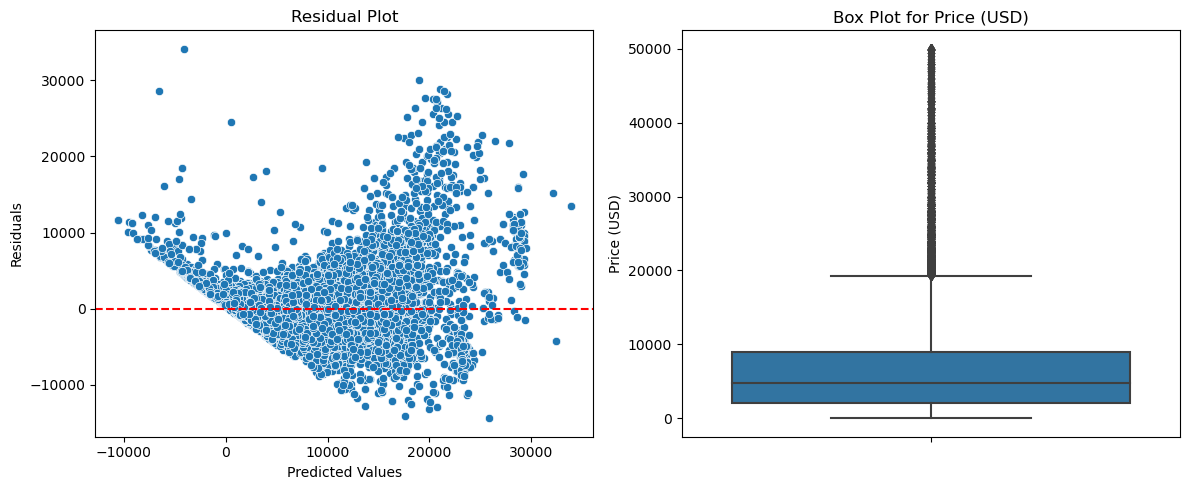

In [25]:
# Create a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Subplot 1: Residual Plot
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Subplot 2: Box Plot for y_train
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot for Price (USD)')
plt.ylabel('Price (USD)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


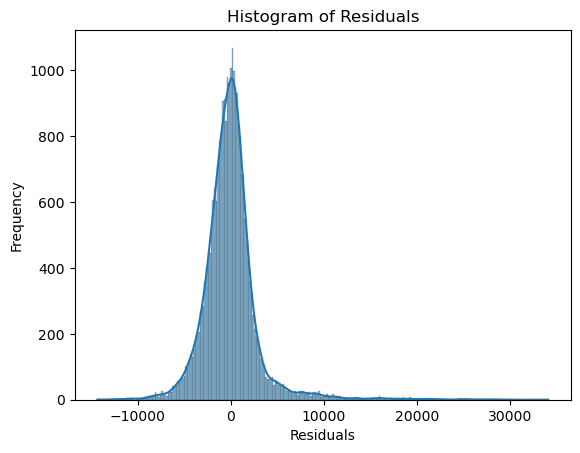

In [26]:
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Residual Plot
Observation: The residuals display a pattern, indicating potential issues with the model, such as non-linearity or heteroscedasticity.
### Box Plot for Price (USD)
Observation: There are numerous outliers, showing a long-tailed distribution in car prices.
### Histogram of Residuals
Observation: The residuals are slightly right-skewed, suggesting occasional underprediction by the model.
#### Overall Conclusion
These visualizations hint at limitations in the linear regression model, possibly necessitating more complex models or data transformations.

Given the patterns observed in the residuals and the issues identified, it might be more beneficial to consider other models or approaches. The linear regression model seems to have limitations in capturing the complexity of the data, which might be due to non-linear relationships, heteroscedasticity, or the influence of outliers.

## KNN

**The K-Nearest Neighbors (KNN)** algorithm is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. For regression, KNN predicts the output based on the average of the k-nearest neighbors’ target values.

**Why Use KNN in this Context:**
- Non-Linear Relationships: KNN can capture non-linear relationships between features and the target variable, which might be beneficial given the patterns observed in the residuals of the linear regression model.
- Flexibility: By adjusting 
k (the number of neighbors), KNN can be made more robust to noise in the input data.
- Ease of Use: KNN is straightforward to implement and understand.

In [45]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(OH_X_train)
X_test_scaled = scaler.transform(OH_X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Transform the target variable (log transformation)
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Lists to store results
k_values = list(range(2, 9))
mse_values = []
r2_values = []
mae_values = []

for k in k_values:
    # Initialize the KNN regressor with the current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Train the KNN model on the reduced data
    knn_regressor.fit(X_train_pca, y_train_transformed)

    # Make predictions on the reduced test data
    y_pred_transformed = knn_regressor.predict(X_test_pca)

    # Reverse the transformation of the target variable
    y_pred = np.expm1(y_pred_transformed)

    # Calculate MSE, R^2, and MAE for the current k value
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)
    mae_values.append(mae)

# Results
k_best_mse = k_values[np.argmin(mse_values)]
k_best_r2 = k_values[np.argmax(r2_values)]
k_best_mae = k_values[np.argmin(mae_values)]

In [46]:
mse_values, r2_values, mae_values

([8446299.206542443,
  9830707.062033845,
  10411090.47800413,
  11025300.727327384,
  11479272.832787948,
  11902913.993055413,
  12228516.314327009],
 [0.791040371975037,
  0.7567904190140714,
  0.7424318579748096,
  0.7272364283447188,
  0.7160052559731234,
  0.7055244646702314,
  0.697469133184428],
 [1682.4872841379556,
  1877.5107914327477,
  1950.183507126339,
  2006.765842766001,
  2047.9900641307597,
  2085.2913804074615,
  2113.8021072546767])

In [23]:
print("Best k:", k_best_mae)

Best k: 2


### Interpretation of Results
- **Mean Squared Error (MSE):** The MSE values start relatively low at  k = 2 k=2, increase as  k k increases, and then stabilize. This suggests that the model performs best with a smaller neighborhood. 
- **R^2 Score:** The R^2 values are relatively high, starting at 0.79 for  k = 2 k=2 and gradually decreasing as  k k increases. This indicates a good fit of the model, especially at lower  k k values. 
- **Mean Absolute Error (MAE):** The MAE values increase as  k k increases, suggesting that the average error in predictions is lower with a smaller neighborhood. 
#### Overall 
The model performs best with a smaller neighborhood ( k = 2 k=2), as indicated by the lower MSE, higher R^2, and lower MAE. As  k k increases, the model's performance slightly degrades. This could be because a larger neighborhood includes points that are less similar to the query point, leading to less accurate predictions.

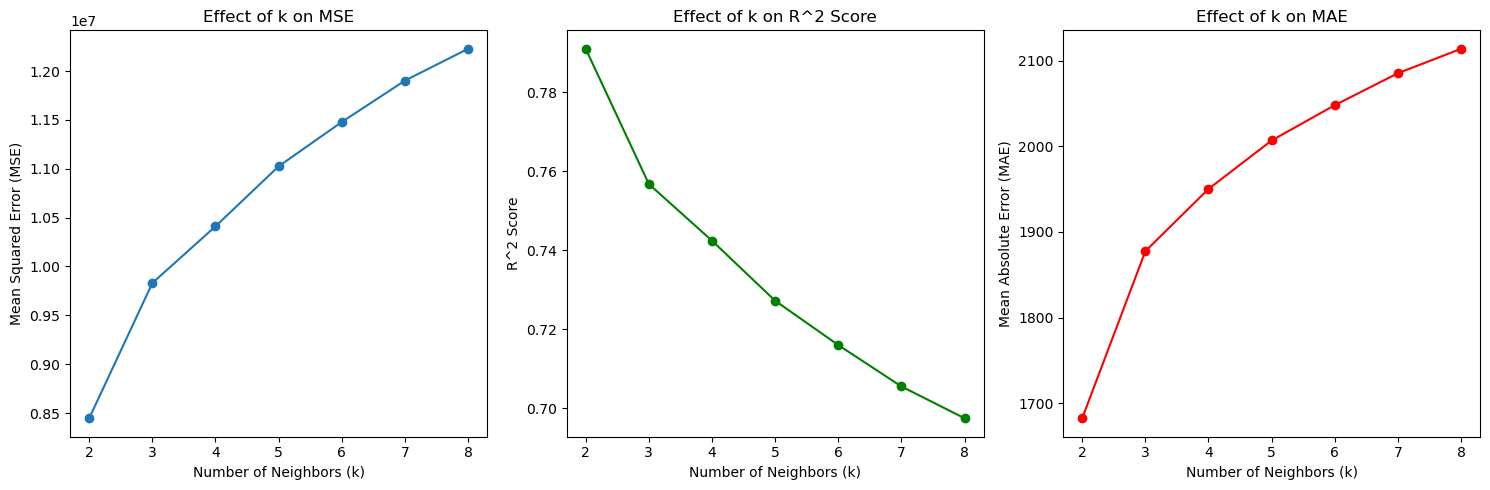

In [47]:
# Create a plot to visualize the effect of k on MSE, R^2, and MAE
plt.figure(figsize=(15, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of k on MSE')

# Plot R^2
plt.subplot(1, 3, 2)
plt.plot(k_values, r2_values, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.title('Effect of k on R^2 Score')

# Plot MAE
plt.subplot(1, 3, 3)
plt.plot(k_values, mae_values, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of k on MAE')

plt.tight_layout()
plt.show()

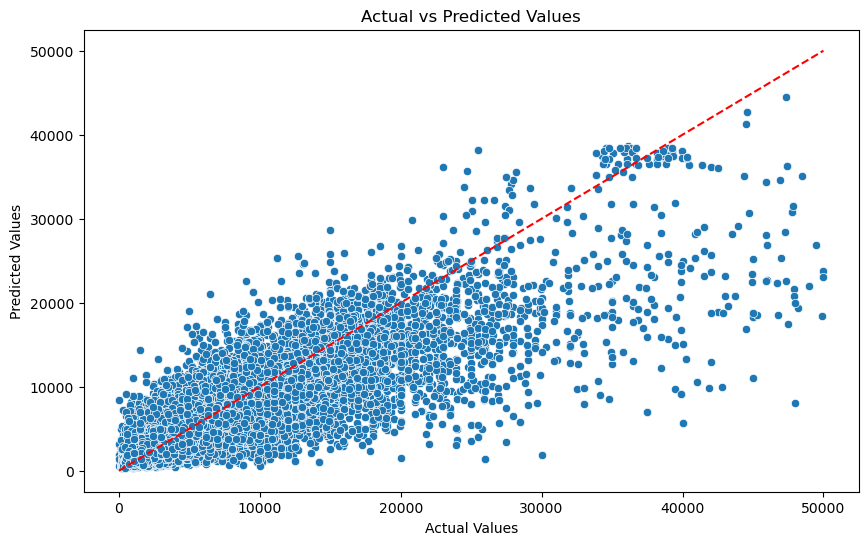

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Decision Tree

A Decision Tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. In a Decision Tree for regression, the target variable is continuous.

**Why Use Decision Trees?**
- Interpretability: Decision Trees are easy to understand and interpret visually.
- Handling Non-Linearity: They can capture non-linear patterns in the data without requiring any transformation.
- No Need for Feature Scaling: Decision Trees do not require the input variables (features) to be scaled or centered.
- Feature Importance: They inherently perform feature selection, giving insight into the most significant features.


In [49]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the transformed and encoded data
dt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = dt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 2215921.525865903
Mean Absolute Error: 529.4422904726302
R^2 Score: 0.9451785774509643


### Interpretation
- **Mean Squared Error (MSE):** At 2,215,921.53, the MSE is significantly lower than that of previous models, indicating that the Decision Tree Regressor has achieved a high level of accuracy, with smaller average squared errors in its predictions.
- **Mean Absolute Error (MAE):** The MAE is just 529.44, demonstrating that, on average, the model's predictions are only about 529.44 units away from the true values. This low MAE highlights the model's precision.
- **R^2 Score:** An R^2 Score of 0.9452 reflects an excellent fit of the model to the data, explaining 94.52% of the variance in the target variable. This suggests that the model has captured the underlying patterns in the data very well.

#### Visualization 

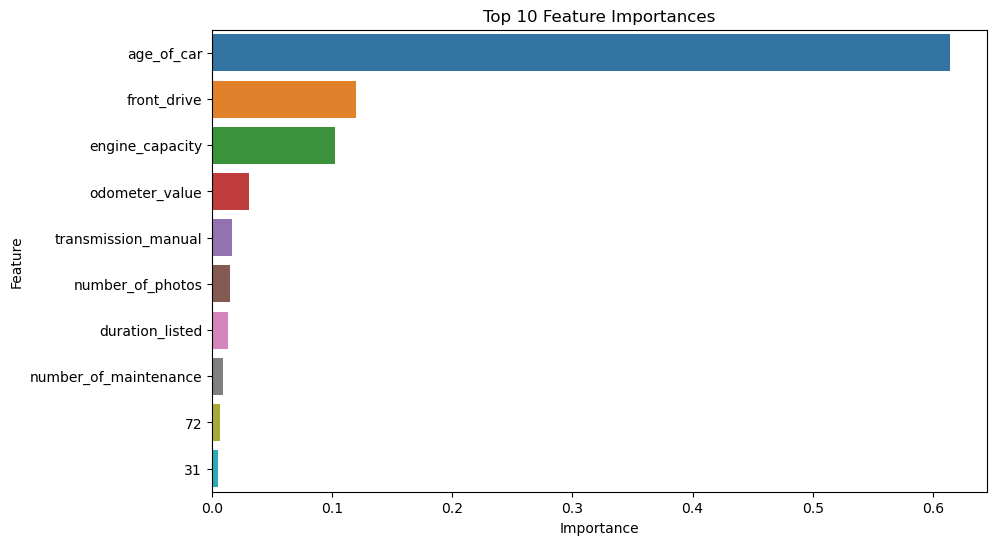

In [50]:
feature_importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': OH_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

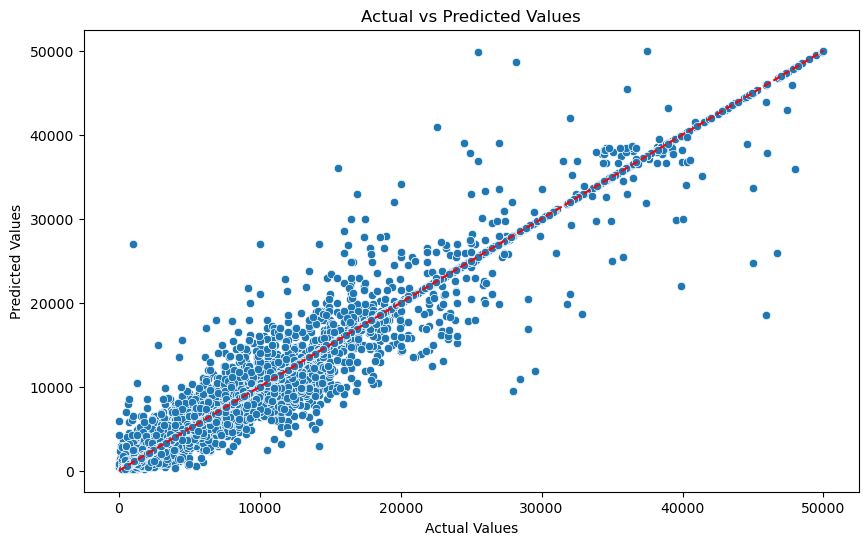

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

The graph shows the features with higher effect on the price at the top.

### Overall
The Decision Tree Regressor has provided a highly accurate model for predicting the car prices, as evidenced by the low MSE and MAE, and the high R^2 Score. It seems to be a good fit for this particular dataset, capturing the underlying patterns effectively.

Moving forward, you might want to consider further tuning the model (e.g., pruning the tree to avoid overfitting), or exploring ensemble methods such as Random Forests or Gradient Boosted Trees for potentially even better performance.

## Gradient Boosting Regression

Gradient Boosting is a powerful ensemble learning technique that builds and combines multiple weak learners (typically decision trees) to create a strong predictive model. It is particularly effective for regression problems with complex data structures and relationships.

**Why Use Gradient Boosting for Regression?**
- Accuracy: Gradient Boosting tends to provide very accurate predictions, often outperforming other algorithms.
- Handling Various Data Types: It can handle different types of predictor variables and accommodate missing data.
- Feature Importance: Like decision trees, Gradient Boosting provides feature importance scores, helping to understand which features are most influential in predicting the target.
- Flexibility: It can be used for both regression and classification problems.

In [33]:
# Initialize the Gradient Boosting Regressor model
gbdt_model = GradientBoostingRegressor(random_state=42)

# Train the model on the transformed and encoded data
gbdt_model.fit(OH_X_train, y_train)

# Predictions on the test data
y_pred = gbdt_model.predict(OH_X_test)

# Calculate the MSE, R^2, and MAE metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 4617096.995523205
R^2: 0.8857740121268276
Mean Absolute Error: 1329.937889590208


#### Interpretation
- **Mean Squared Error (MSE):** The MSE value of 4,617,096.99 indicates that the model's predictions are, on average, within a squared distance of 4,617,096.99 units from the actual values. While this value is higher than some of the previous models, it still reflects a relatively good fit, considering the scale and variability of the data.
- **Mean Absolute Error (MAE):** With an MAE of 1,329.94, the model's predictions deviate from the actual values by an average of 1,329.94 units. This value provides a more intuitive sense of the model's accuracy, and in this context, it indicates a reasonably good performance.
- **R^2 Score:** The R^2 score of 0.8858 shows that the model can explain approximately 88.58% of the variance in the target variable. This high R^2 value suggests that the model has a strong fit to the data and is capable of making accurate predictions.

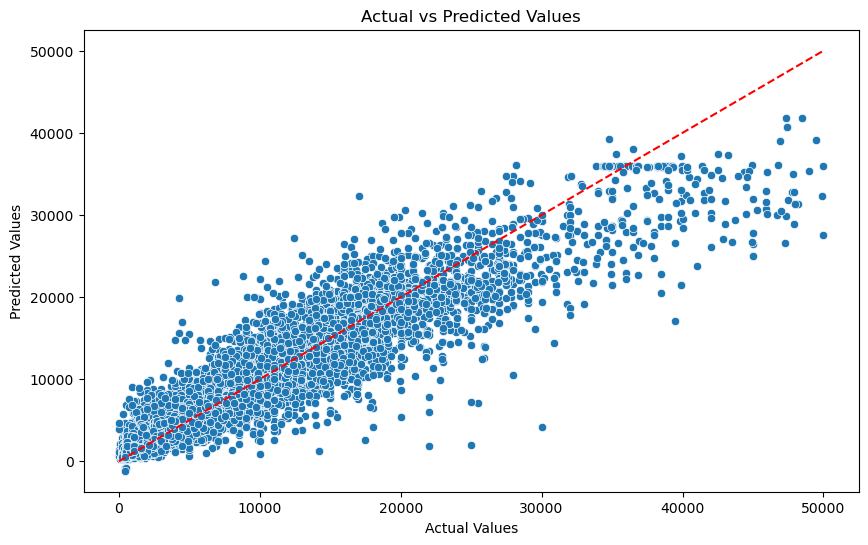

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### Overall Interpretation
The Gradient Boosting Regressor has performed quite well on this dataset, with a high R^2 score indicating good fit and relatively low error metrics (MSE and MAE) compared to the model complexity and data variability. This suggests that the model has successfully captured the underlying patterns in the data, providing accurate and reliable predictions.

# Conclusion 

The Notebook provided valuable insights into different regression models, their strengths, weaknesses, and suitability for different types of data. The Decision Tree and Gradient Boosting models showed particularly strong performance, capturing complex patterns in the data with high accuracy.

Moving forward, we will be using the **Decision Tree** model for this data 
